In [34]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df=pd.read_csv("/Users/harshit_mac/Desktop/datascience/income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


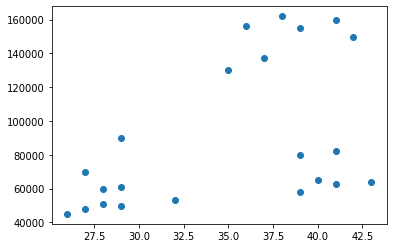

In [36]:
plt.scatter(df['Age'],df['Income($)'])

In [37]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [38]:
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [39]:
km.cluster_centers_                          #to obtain the coordinates of centroids

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

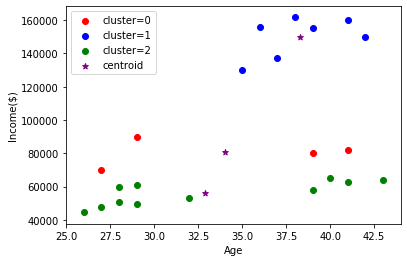

In [40]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='red',label='cluster=0')
plt.scatter(df2.Age,df2['Income($)'],color='blue',label='cluster=1')
plt.scatter(df3.Age,df3['Income($)'],color='green',label='cluster=2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [ ]:
#above distribution seems very wrong because of the larger variance in the values of Income($) compared to the values 
#of Age.
#This is solved using MinMaxScaler to scale down the values 

In [41]:
sc=MinMaxScaler()
sc.fit(df[['Income($)']])
df['Income($)']=sc.transform(df[['Income($)']])
sc.fit(df[['Age']])
df.Age=sc.transform(df[['Age']])

In [42]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


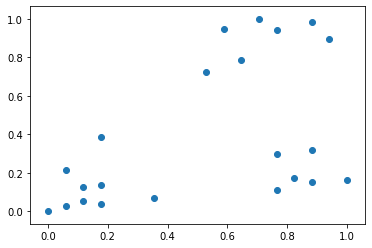

In [43]:
plt.scatter(df.Age,df['Income($)'])

In [44]:
km2=KMeans(n_clusters=3)
y_predicted2=km2.fit_predict(df[['Age','Income($)']])
y_predicted2

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [45]:
df['cluster2']=y_predicted2
df

,Name,Age,Income($),cluster,cluster2
0,Rob,0.058824,0.213675,0,1
1,Michael,0.176471,0.384615,0,1
2,Mohan,0.176471,0.136752,2,1
3,Ismail,0.117647,0.128205,2,1
4,Kory,0.941176,0.897436,1,0
5,Gautam,0.764706,0.940171,1,0
6,David,0.882353,0.982906,1,0
7,Andrea,0.705882,1.000000,1,0
8,Brad,0.588235,0.948718,1,0
9,Angelina,0.529412,0.726496,1,0


In [46]:
km2.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

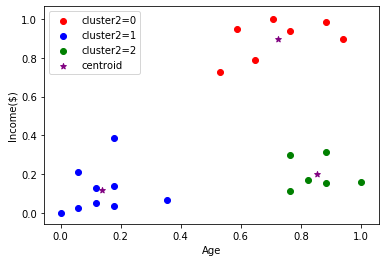

In [48]:
df11=df[df.cluster2==0]
df22=df[df.cluster2==1]
df33=df[df.cluster2==2]
plt.scatter(df11.Age,df11['Income($)'],color='red',label='cluster2=0')
plt.scatter(df22.Age,df22['Income($)'],color='blue',label='cluster2=1')
plt.scatter(df33.Age,df33['Income($)'],color='green',label='cluster2=2')
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [49]:
#this was a simple dataset but when the number of features increases,it becomes difficult to decide the value of k
#ELBOW METHOD helps in resolving this issue

In [55]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)                    #KMeans.inetria_ gives the value of Sum of Squared Errors

In [56]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2664030124668416,
 0.22443334487241418,
 0.1813481925495057,
 0.13762504146528043,
 0.10497488680620906]

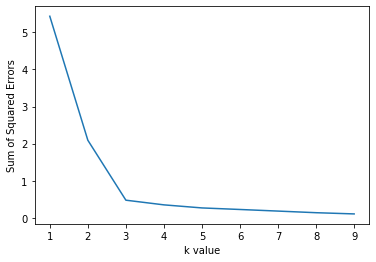

In [58]:
plt.xlabel('k value')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_range,sse)

In [59]:
#This Elbow like plot tells that k=3 will be a good fit for the number of clusters

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

In [20]:
iris=load_iris()

In [28]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [29]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
df=df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns')

In [31]:
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


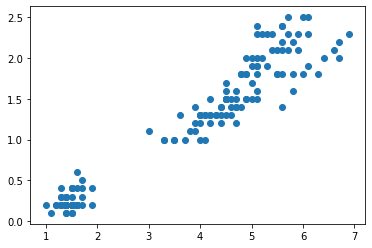

In [32]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [33]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

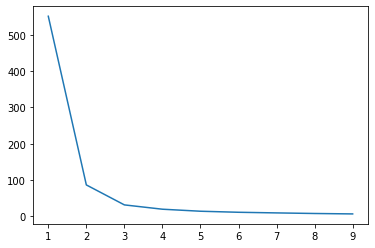

In [48]:
plt.plot(k_range,sse)

In [49]:
sc=MinMaxScaler()
sc.fit(df[['petal length (cm)']])
df['petal length (cm)']=sc.transform(df[['petal length (cm)']])
sc.fit(df[['petal width (cm)']])
df['petal width (cm)']=sc.transform(df[['petal width (cm)']])

In [50]:
df

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


In [51]:
kmm=KMeans(n_clusters=3)
y_pred=kmm.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [52]:
df['cluster']=y_pred

In [53]:
df

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


In [56]:
kmm.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.7740113 , 0.81510417],
       [0.55867014, 0.51041667]])

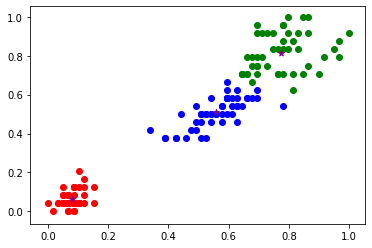

In [57]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue')

plt.scatter(kmm.cluster_centers_[:,0],kmm.cluster_centers_[:,1],marker='*',color='purple',label='centroid')